# 라이브러리 임포트 및 데이터 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
from matplotlib import font_manager, rc
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors


font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

data = pd.read_csv('C:/Users/hyunj/Desktop/데이터마이닝 코드/New_After_Preprocessing_Data.csv', encoding='CP949')
data

,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,BMI,cluster
0,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,29.0,54.0,24.0,1.0,1.0,25.39,4
1,130.0,80.0,102.0,158.0,193.0,41.0,79.0,14.8,0.7,21.0,19.0,20.0,1.0,0.0,24.22,3
2,165.0,100.0,97.0,192.0,69.0,79.0,99.0,15.4,0.9,24.0,10.0,46.0,3.0,1.0,27.68,0
3,140.0,80.0,93.0,256.0,148.0,46.0,180.0,16.0,1.1,20.0,22.0,23.0,3.0,1.0,25.95,3
4,136.0,86.0,98.0,209.0,100.0,39.0,150.0,14.0,1.0,28.0,32.0,19.0,2.0,1.0,23.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33692,125.0,70.0,116.0,184.0,114.0,49.0,112.0,16.9,1.0,20.0,10.0,21.0,3.0,1.0,19.59,2
33693,108.0,76.0,107.0,214.0,97.0,50.0,144.0,15.5,0.7,24.0,24.0,52.0,1.0,1.0,23.88,0
33694,116.0,72.0,103.0,276.0,75.0,75.0,180.0,13.4,0.9,40.0,44.0,25.0,1.0,1.0,22.49,0
33695,120.0,70.0,110.0,224.0,73.0,65.0,144.0,15.1,0.9,24.0,14.0,35.0,2.0,1.0,21.22,0


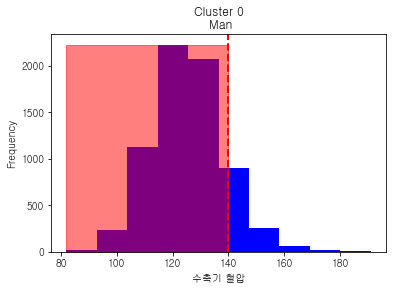

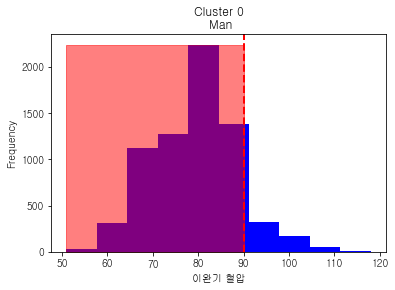

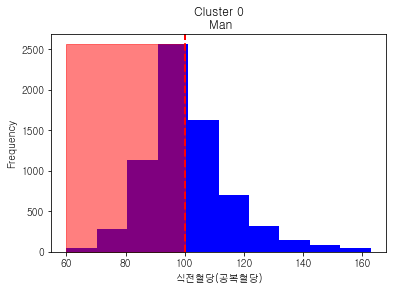

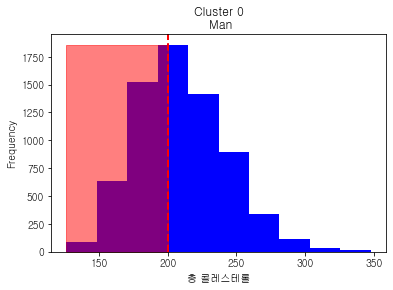

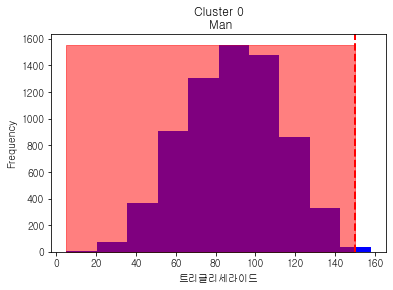

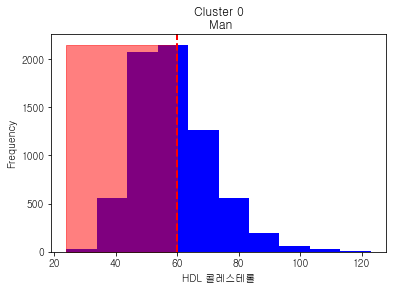

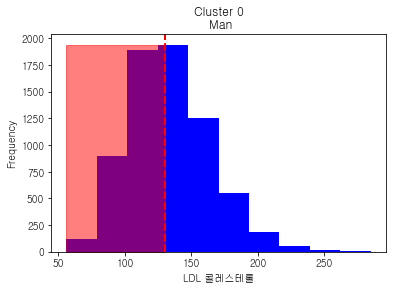

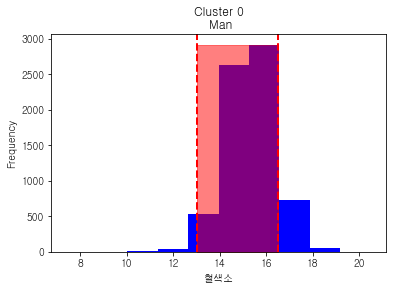

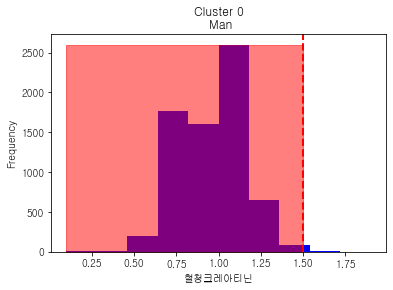

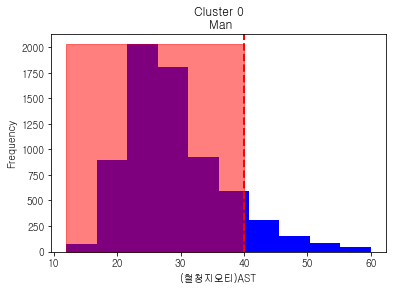

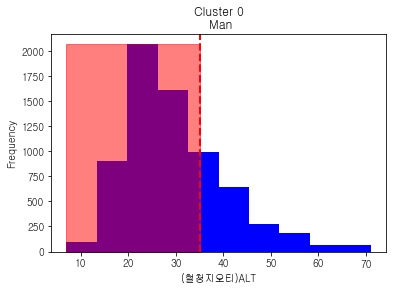

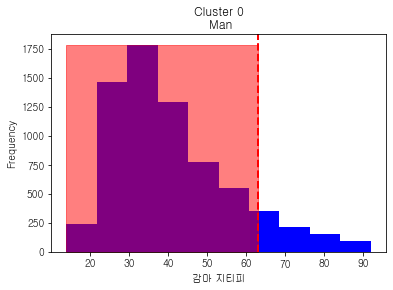

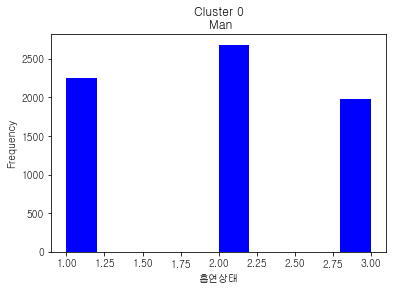

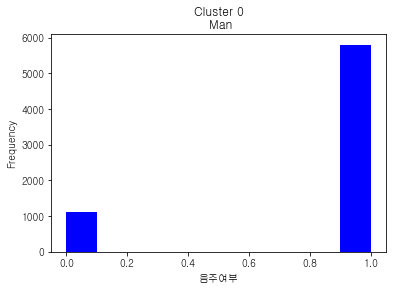

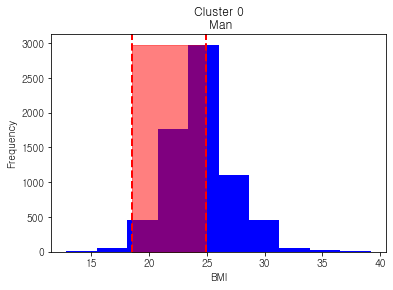

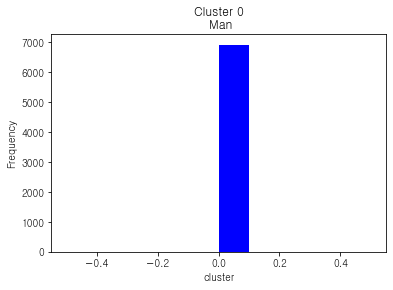

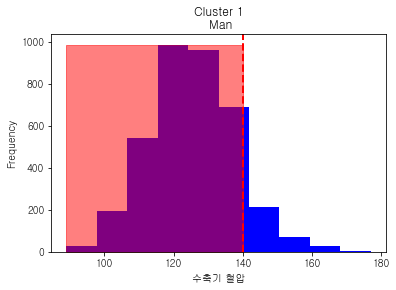

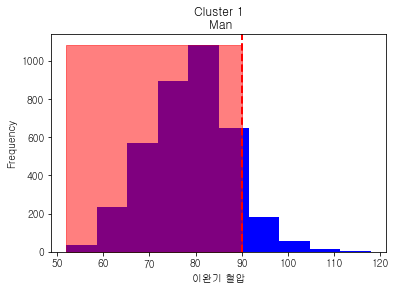

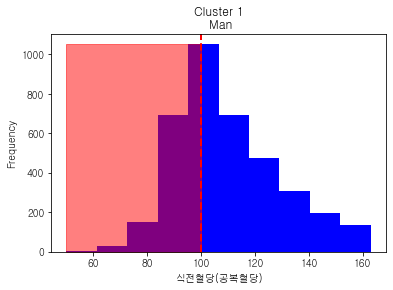

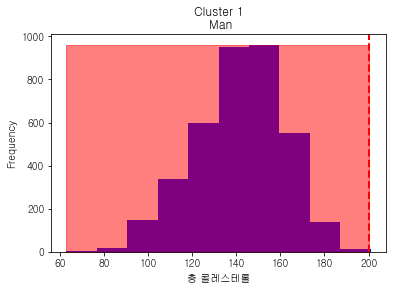

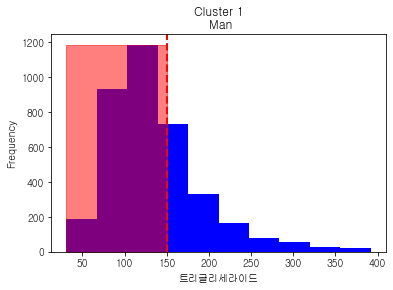

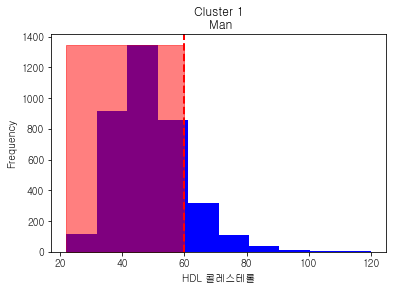

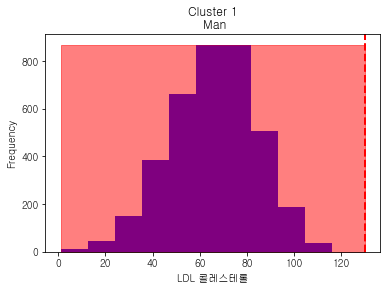

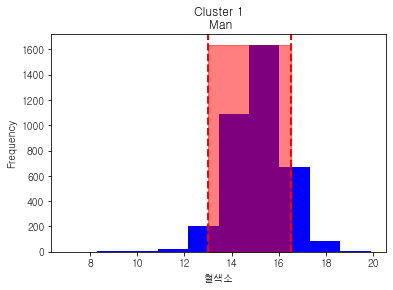

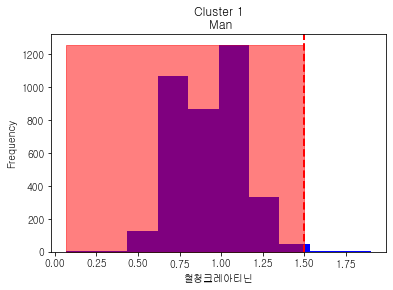

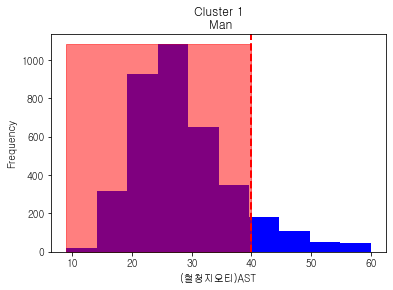

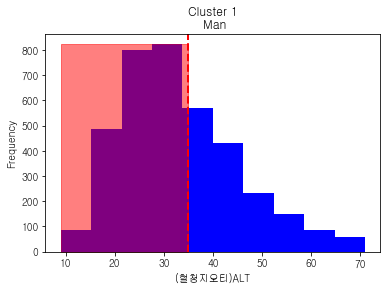

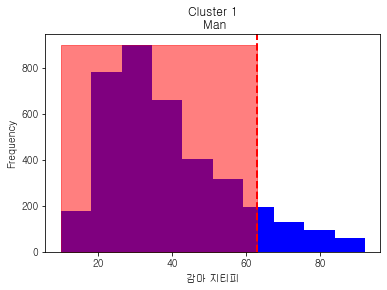

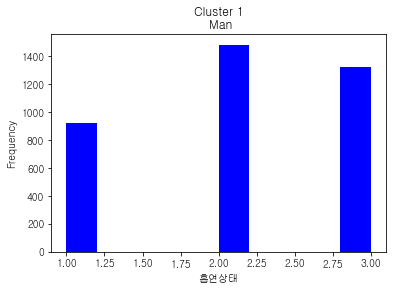

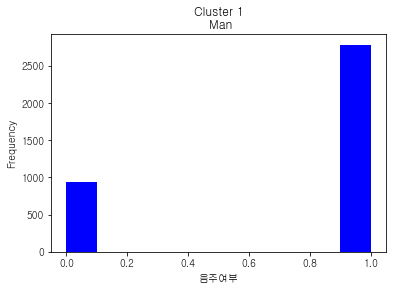

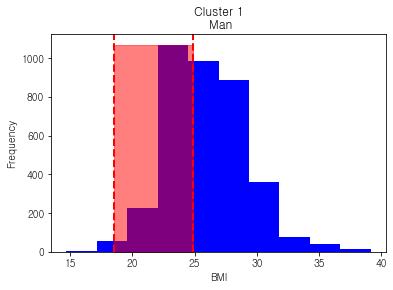

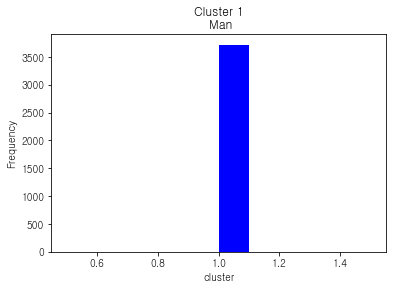

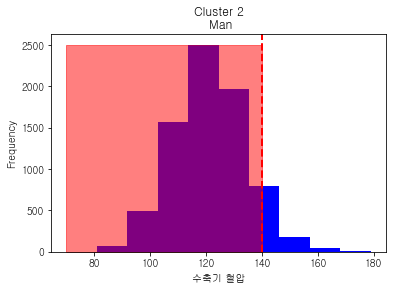

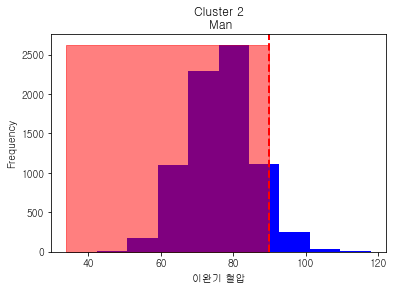

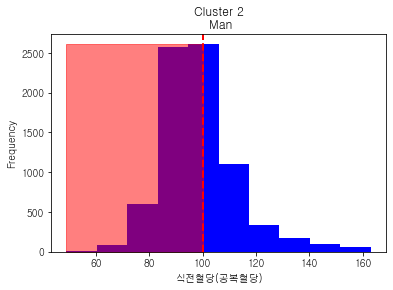

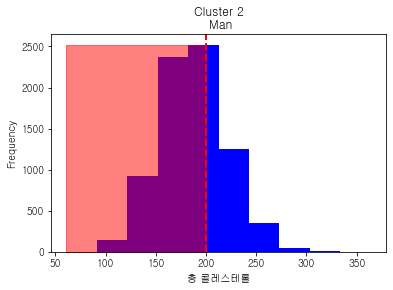

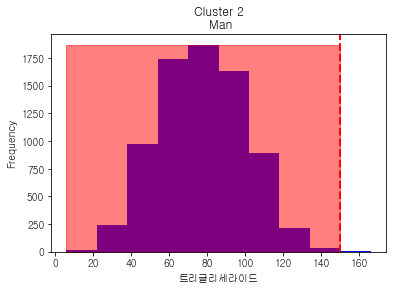

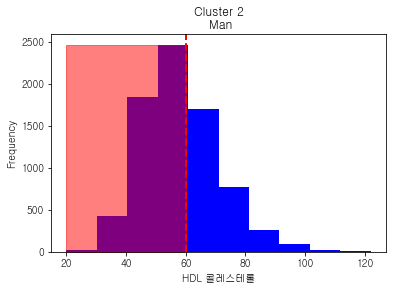

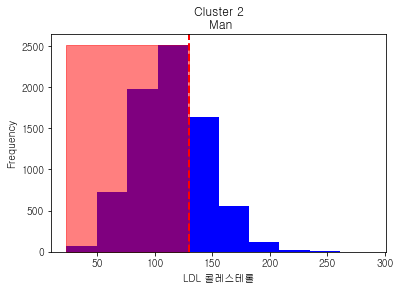

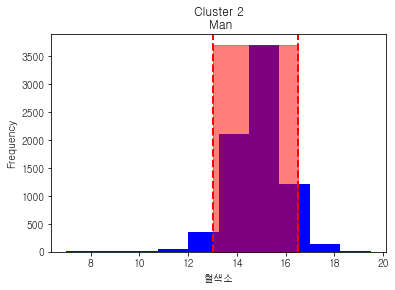

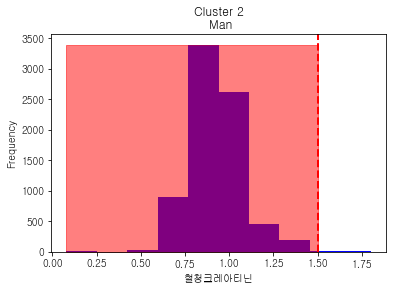

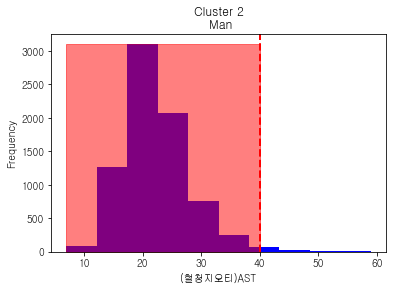

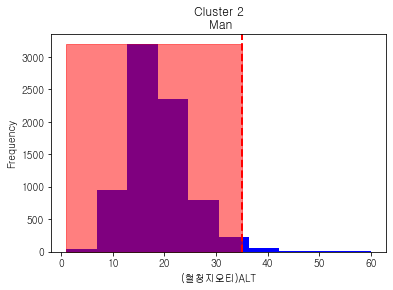

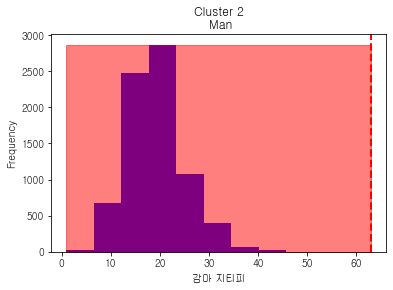

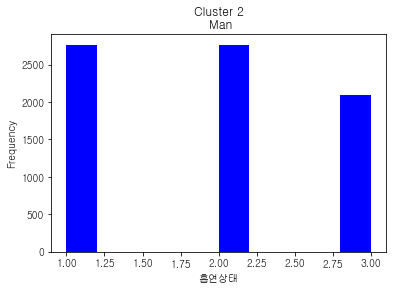

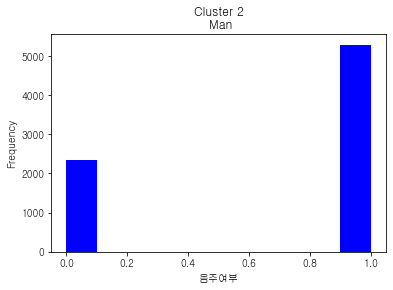

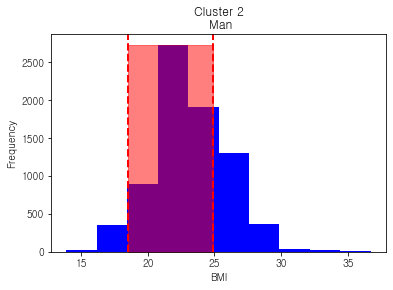

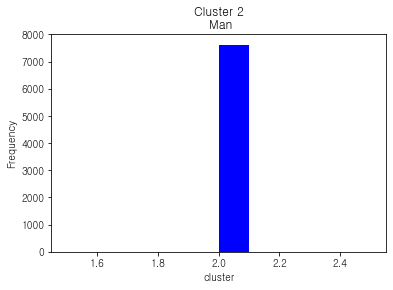

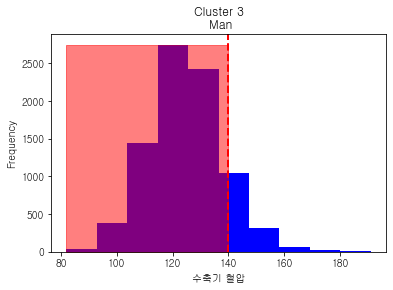

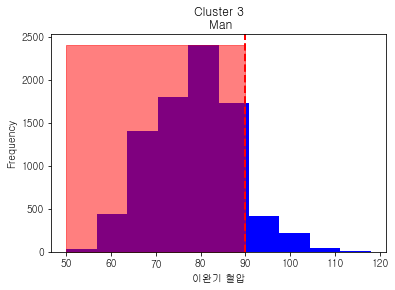

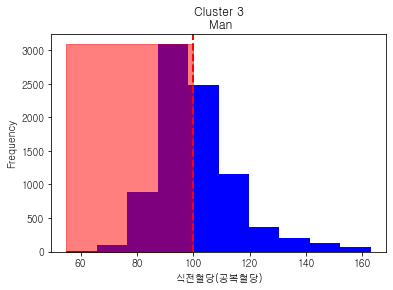

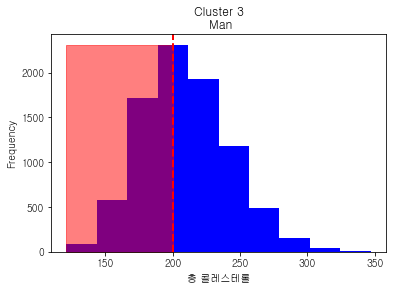

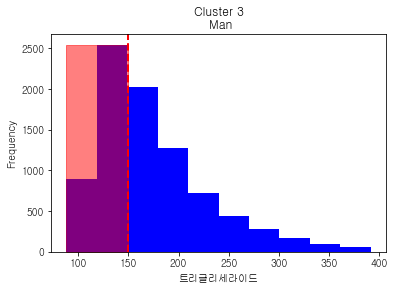

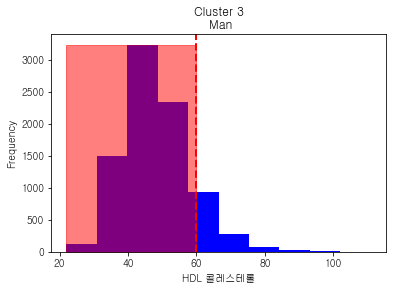

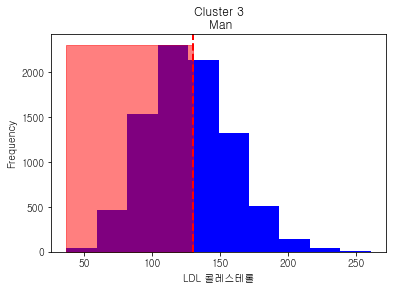

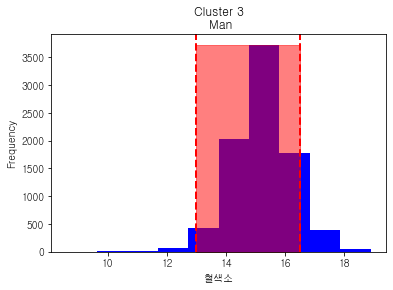

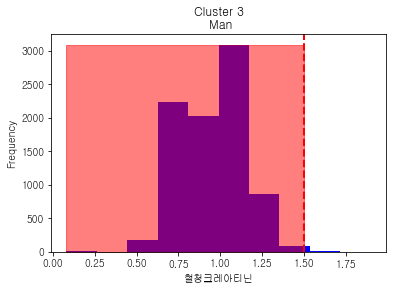

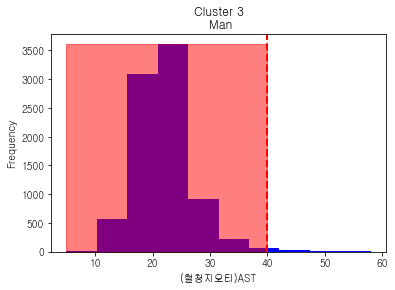

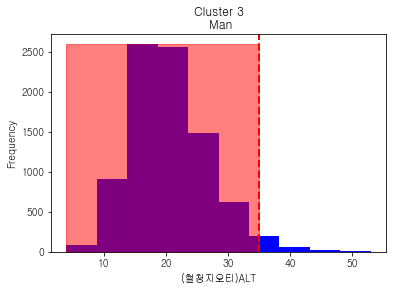

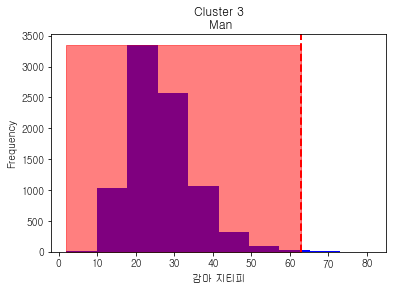

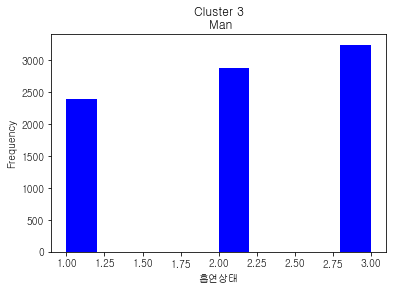

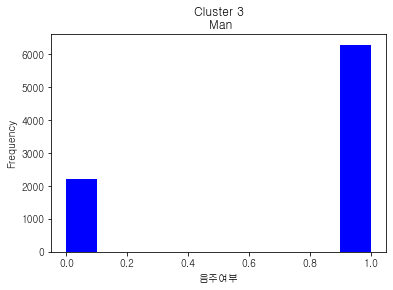

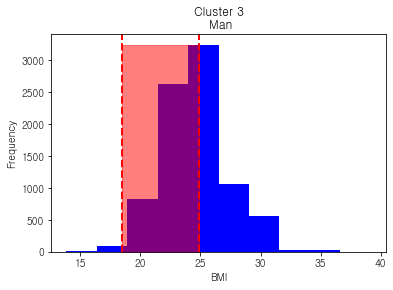

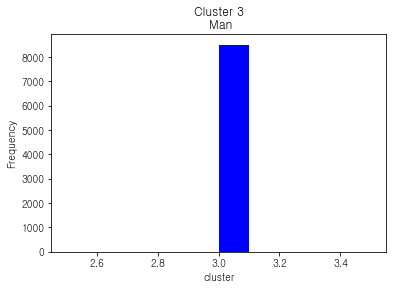

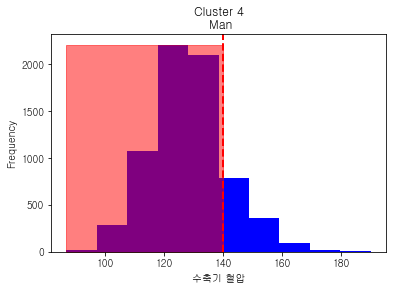

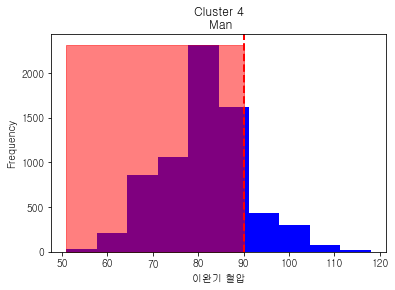

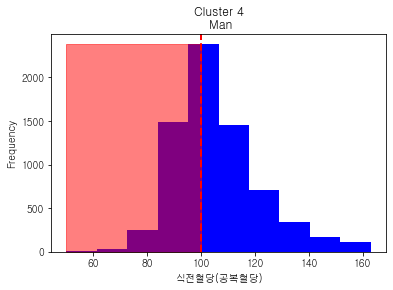

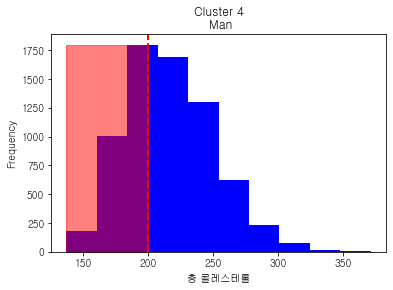

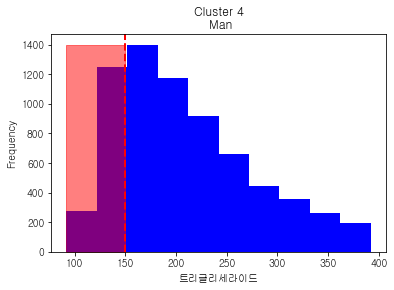

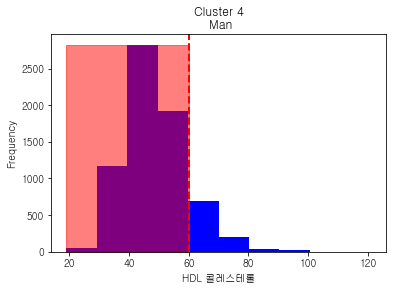

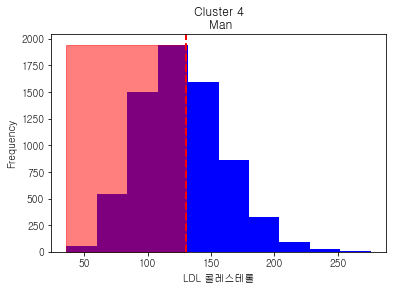

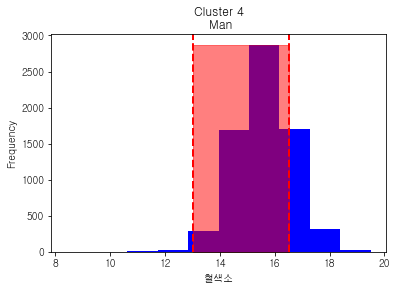

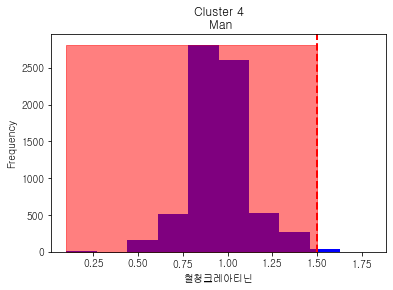

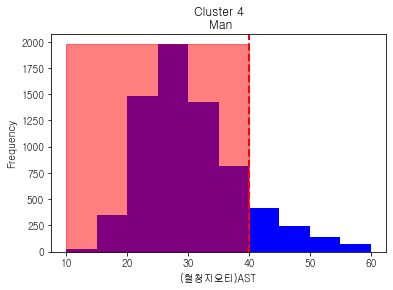

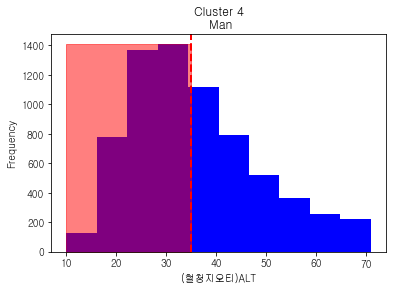

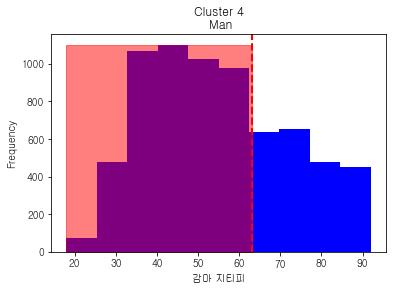

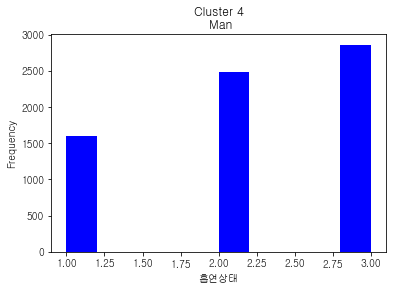

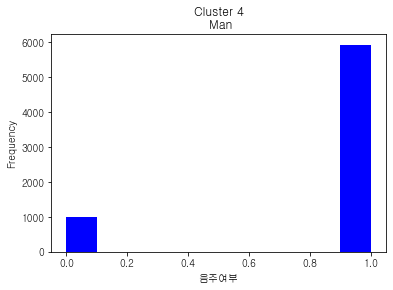

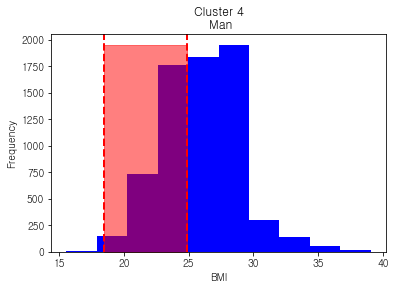

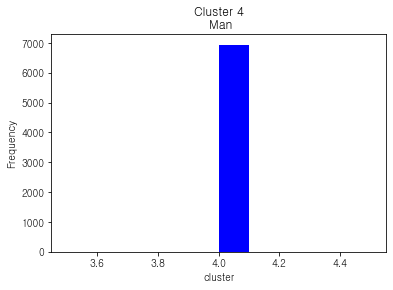

'            \n        if sex == 2 :\n            temp_df_woman = temp_df.loc[temp_df[\'성별코드\'] == 2]\n            for feature in feature_list :\n                if feature == \'수축기 혈압\' : # 140밑으로 정상\n                    y, x, _ = plt.hist(temp_df_woman[feature], color=\'blue\')\n                    plt.xlabel(str(feature))\n                    plt.ylabel("Frequency")\n                    plt.title("Cluster " + str(cluster) + "\n Woman")\n                    plt.axvline(140, 0, 1, color=\'red\', linestyle=\'--\', linewidth=2)\n                    plt.fill_between([x.min(), 140], [y.max(), y.max()], color = \'red\', alpha = 0.5)\n                    plt.show()\n                    \n                elif feature == \'이완기 혈압\' : # 90밑으로 정상 \n                    y, x, _ = plt.hist(temp_df_woman[feature], color=\'blue\')\n                    plt.xlabel(str(feature))\n                    plt.ylabel("Frequency")\n                    plt.title("Cluster " + str(cluster) + "\n Woman")\n        

In [2]:
# 안 좋은 코드
clusters = [0, 1, 2, 3, 4]
sexs = [1, 2]
feature_list = list(data.columns)

for cluster in clusters : 
    temp_df = data.loc[data['cluster'] == cluster]
    for sex in sexs : 
        # 만약에 남자라면
        if sex == 1 :
            # temp_df_man = temp_df.loc[temp_df['성별코드'] == 1]
            # 이 경우에는 남자의 데이터만 가져온 것이기 때문에 따로 범위를 정해주지 않아도 됨
            temp_df_man = temp_df.copy()
            for feature in feature_list :
                if feature == '수축기 혈압' : # 140밑으로 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(140, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 140], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '이완기 혈압' : # 90밑으로 정상 
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(90, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 90], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '식전혈당(공복혈당)' : # 100밑으로 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(100, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 100], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                
                elif feature == '총 콜레스테롤' : # 200밑으로 정상 
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(200, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 200], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '트리글리세라이드' : # 150 밑으로 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(150, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 150], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == 'HDL 콜레스테롤' : # 60이상일 때 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(60, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 60], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == 'LDL 콜레스테롤' : # 130이하일때 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(130, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 130], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '혈색소' : # ★ 남성은 13~16.5가 정상 / 여성은 12~15.5가 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(13, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.axvline(16.5, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([13, 16.5], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '혈청크레아티닌' : # 1.5 밑으로 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(1.5, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 1.5], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '(혈청지오티)AST' : # 40밑으로 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(40, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 40], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                
                elif feature == '(혈청지오티)ALT' : # 35이하 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(35, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 35], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                
                elif feature == '감마 지티피' :# ★ 남자는 63이하 정상 / 여자는 35이하 정상 
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(63, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 63], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature =='BMI' : # 18.5 ~ 24.9 까지가 정상
                    y, x, _ = plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.axvline(18.5, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.axvline(24.9, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([18.5, 24.9], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                else : 
                    plt.hist(temp_df_man[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Man")
                    plt.show()
'''            
        if sex == 2 :
            temp_df_woman = temp_df.loc[temp_df['성별코드'] == 2]
            for feature in feature_list :
                if feature == '수축기 혈압' : # 140밑으로 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(140, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 140], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '이완기 혈압' : # 90밑으로 정상 
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(90, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 90], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '식전혈당(공복혈당)' : # 100밑으로 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(100, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 100], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                
                elif feature == '총 콜레스테롤' : # 200밑으로 정상 
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(200, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 200], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '트리글리세라이드' : # 150 밑으로 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(150, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 150], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == 'HDL 콜레스테롤' : # 60이상일 때 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(60, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 60], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == 'LDL 콜레스테롤' : # 130이하일때 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(130, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 130], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '혈색소' : # ★ 남성은 13~16.5가 정상 / 여성은 12~15.5가 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(12, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.axvline(15.5, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([12, 15.5], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '혈청크레아티닌' : # 1.5 밑으로 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(1.5, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 1.5], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature == '(혈청지오티)AST' : # 40밑으로 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(40, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 40], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                
                elif feature == '(혈청지오티)ALT' : # 35이하 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(35, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 35], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                
                elif feature == '감마 지티피' :# ★ 남자는 63이하 정상 / 여자는 35이하 정상 
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(35, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([x.min(), 35], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                elif feature =='BMI' : # 18.5 ~ 24.9 까지가 정상
                    y, x, _ = plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.axvline(18.5, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.axvline(24.9, 0, 1, color='red', linestyle='--', linewidth=2)
                    plt.fill_between([18.5, 24.9], [y.max(), y.max()], color = 'red', alpha = 0.5)
                    plt.show()
                    
                else : 
                    plt.hist(temp_df_woman[feature], color='blue')
                    plt.xlabel(str(feature))
                    plt.ylabel("Frequency")
                    plt.title("Cluster " + str(cluster) + "\n Woman")
                    plt.show()
'''